# Save high-scoring tokens for SAUR cohort

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read token information from bed files

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


<Axes: >

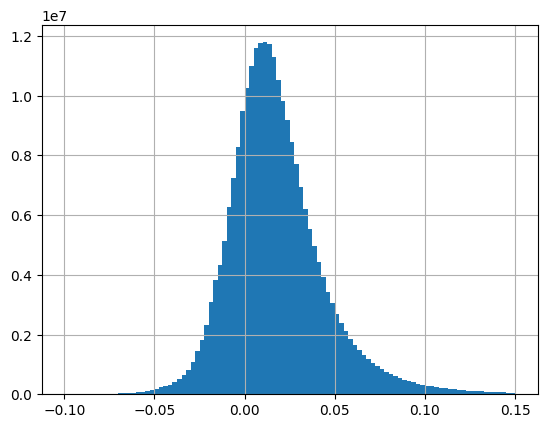

In [3]:
bedDf[(bedDf.score > -0.1) & (bedDf.score < 0.15)].score.hist(bins=100)

In [4]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


In [5]:
len(bedDf.tokens.unique())

31990

In [7]:
highscoreCutoff = bedDf.score.mean() + 3 * bedDf.score.std()
highscoreCutoff

np.float64(0.10044996853550375)

In [9]:
highscoreDf = bedDf[(bedDf.score > highscoreCutoff) & (bedDf.token_length > 5)]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
790,1,5456,5461,TTCCGG,0.109817,AH21B049,6
1141,1,7901,7906,GGTTTT,0.126671,AH21B049,6
1544,1,10694,10701,CCCGACGG,0.119595,AH21B049,8
2280,1,15816,15822,CGCCGCC,0.154397,AH21B049,7
2384,1,16539,16545,CGCCGCC,0.101574,AH21B049,7
...,...,...,...,...,...,...,...
247347891,5,247308,247313,CTCACC,0.103520,ALF22C077,6
247347911,5,247447,247452,CTGTTC,0.117534,ALF22C077,6
247348343,5,250450,250457,CCCTTTTT,0.104689,ALF22C077,8
247349058,5,255352,255357,GAAAAA,0.100641,ALF22C077,6


In [10]:
len(highscoreDf.tokens.unique())

12915

In [11]:
highscoreDf.shape

(2322717, 7)

<Axes: >

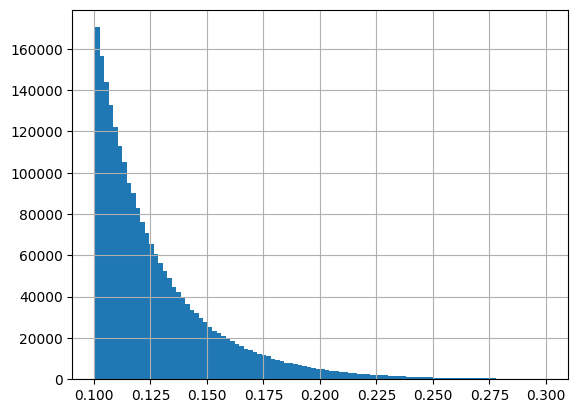

In [12]:
highscoreDf[(highscoreDf.score < 0.3)].score.hist(bins=100)

In [13]:
highscoreDf.token_length.value_counts()

token_length
6     1005832
7      585361
8      339503
9      263575
10      92597
11      30865
12       2730
16       1991
15        152
13        102
14          9
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

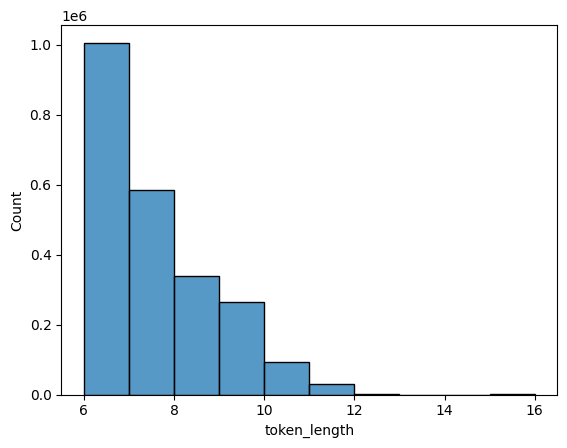

In [14]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Create a dataframe containing tokens

In [15]:
import pandas as pd


df = pd.DataFrame(highscoreDf.tokens.unique())
df

,0
0,TTCCGG
1,GGTTTT
2,CCCGACGG
3,CGCCGCC
4,ACTGTG
...,...
12910,GCTACCCG
12911,AAAGTGGT
12912,AACAGTTAC
12913,GTTCAACCAT


## Save the dataframe to a file

In [16]:
import os
from pathlib import Path


df.to_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'high_score_tokens.csv'), index=False, header=None)